# Time series clustering exercise

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import zipfile 
from __future__ import print_function
import os
import sklearn.cluster
from functools import reduce
import sklearn.cluster as cluster
from sklearn.cluster import spectral_clustering

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

In [1]:
#these commands can be run on the shell and get the data with the command wget
# #the cell needs to be run only once
# !for ((y=93; y<=99; y+=1)); do wget \
# https://www2.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done

# !for ((y=0; y<=1; y+=1)); do wget \
# https://www2.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp0$y\totals.zip; done

# !for ((y=2; y<=9; y+=1)); do wget \
# https://www2.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done

# !for ((y=10; y<=14; y+=1)); do wget \
# https://www2.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done



 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


In [2]:
# !wget -O application.zip https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip

In [3]:
# os.makedirs(os.getenv("PUIDATA") + '/sk_HW11')
# os.system("mv %s %s "%("*.zip", os.getenv("PUIDATA") +'/sk_HW11'))


256

In [4]:
zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp94totals.zip')
df94 = pd.read_csv(zf.open('zbp94totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp95totals.zip')
df95 = pd.read_csv(zf.open('zbp95totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp96totals.zip')
df96 = pd.read_csv(zf.open('zbp96totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp97totals.zip')
df97 = pd.read_csv(zf.open('zbp97totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp98totals.zip')
df98 = pd.read_csv(zf.open('zbp98totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp99totals.zip')
df99 = pd.read_csv(zf.open('zbp99totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp00totals.zip')
df00 = pd.read_csv(zf.open('zbp00totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp01totals.zip')
df01 = pd.read_csv(zf.open('zbp01totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp02totals.zip')
df02 = pd.read_csv(zf.open('zbp02totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp03totals.zip')
df03 = pd.read_csv(zf.open('zbp03totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp04totals.zip')
df04 = pd.read_csv(zf.open('zbp04totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp05totals.zip')
df05 = pd.read_csv(zf.open('zbp05totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp06totals.zip')
df06 = pd.read_csv(zf.open('zbp06totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp07totals.zip')
df07 = pd.read_csv(zf.open('zbp07totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp08totals.zip')
df08 = pd.read_csv(zf.open('zbp08totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp09totals.zip')
df09 = pd.read_csv(zf.open('zbp09totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp10totals.zip')
df10 = pd.read_csv(zf.open('zbp10totals.zip'.replace('.zip','.txt')))


zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp11totals.zip')
df11 = pd.read_csv(zf.open('zbp11totals.zip'.replace('.zip','.txt')))


zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp12totals.zip')
df12 = pd.read_csv(zf.open('zbp12totals.zip'.replace('.zip','.txt')))


zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp13totals.zip')
df13 = pd.read_csv(zf.open('zbp13totals.zip'.replace('.zip','.txt')))


zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/sk_HW11' + '/zbp14totals.zip')
df14 = pd.read_csv(zf.open('zbp14totals.zip'.replace('.zip','.txt')))

# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: we talked about the importance of "whitening" your data.
Whitenings decorrelates the data: it makes the features independent so that the data covariance matrix is the identity matrix.
Whitening your data in time series analysis is in most cases **wrong**: you are modifying your time behaviour. This is because of the strong correlation between features (two consecutive time stamps for the same observation, the same zip code here, are strongly correlated). Here instead you want to standardize your time series: subtract the mean and divide each time series (separately) by its standard deviation. As a sanity check (if you use skitlearn Kmeans or skitlearns kmeans2): you want your data array to be shaped Nzipcodes x Ntimestamps

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



## Whitening the dataset

In [5]:
def standarzied (df):
    try:
        EMPstd = df['EMP'].std()
        EMPmean = df['EMP'].mean()
        df['EMP_norm'] = (df['EMP'] - EMPmean) / EMPstd

        QP1std = df['QP1'].std()
        QP1mean = df['QP1'].mean()
        df['QP1_norm'] = (df['QP1'] - QP1mean) / QP1std

        APstd = df['AP'].std()
        APmean = df['AP'].mean()
        df['AP_norm'] = (df['AP'] - APmean) / APstd

        ESTstd = df['EST'].std()
        ESTmean = df['EST'].mean()
        df['EST_norm'] = (df['EST'] - ESTmean) / ESTstd
        
        
        df = df.iloc[:,[0,-1]]
       
        df = df.set_index('ZIP')
        return df
    
    except KeyError:
        df.rename( columns = {'zip' : 'ZIP'}, inplace =True )
        EMPstd = df['emp'].std()
        EMPmean = df['emp'].mean()
        df['EMP_norm'] = (df['emp'] - EMPmean) / EMPstd

        QP1std = df['qp1'].std()
        QP1mean = df['qp1'].mean()
        df['QP1_norm'] = (df['qp1'] - QP1mean) / QP1std

        APstd = df['ap'].std()
        APmean = df['ap'].mean()
        df['AP_norm'] = (df['ap'] - APmean) / APstd

        ESTstd = df['est'].std()
        ESTmean = df['est'].mean()
        df['EST_norm'] = (df['est'] - ESTmean) / ESTstd
        
        df = df.iloc[:,[0,-1]]
        
        df = df.set_index('ZIP')
        return df


In [6]:
dflist = [df94, df95, df96, df97, df98, df99, df00, df01, df02, df03, df04, df05, df06, df07, df08, df09, df10, df11, df12, df13, df14]
cleandf = []
for i in range(len(dflist)):
    stand = standarzied(dflist[i])
    cleandf.append(stand)


### merging all whiten dataset into the final data frame

In [8]:
final = reduce(lambda df1,df2: df1.join(df2, lsuffix = '_q'), cleandf)

In [9]:
final.head()

,EST_norm_q,EST_norm_q,EST_norm_q,EST_norm_q,EST_norm_q,EST_norm_q,EST_norm_q,EST_norm_q,EST_norm_q,EST_norm_q,...,EST_norm_q,EST_norm_q,EST_norm_q,EST_norm_q,EST_norm_q,EST_norm_q,EST_norm_q,EST_norm_q,EST_norm_q,EST_norm
ZIP,,,,,,,,,,,,,,,,,,,,,
1001,0.831705,0.832383,0.769146,0.853680,0.758706,0.852882,0.914080,0.899760,0.819542,0.839401,...,0.879744,0.859343,0.830410,0.763424,0.732590,0.705458,0.671096,0.704263,0.652695,0.685808
1002,0.865193,0.917635,0.925906,0.982170,0.888877,1.112183,1.116825,1.179670,1.022111,1.051228,...,1.099864,1.057031,1.080595,1.051773,1.041199,1.037955,1.001780,1.024692,1.005545,0.951752
1003,-0.474323,-0.473793,-0.450097,-0.467074,-0.458118,-0.475669,-0.476170,-0.476707,-0.446518,-0.439405,...,-0.487749,-0.486565,-0.479699,-0.476206,-0.474534,-0.471907,-0.467322,-0.475130,-0.472179,-0.461399
1004,-0.361682,-0.358094,-0.351396,-0.389382,-0.410011,-0.411572,-0.374797,-0.407451,-0.425194,-0.426329,...,-0.435471,-0.437820,-0.468938,-0.473511,-0.469072,-0.458281,-0.459191,-0.472438,-0.469526,-0.474436
1005,-0.224686,-0.214994,-0.194636,-0.201130,-0.228902,-0.274638,-0.264736,-0.254510,-0.235952,-0.238039,...,-0.262127,-0.253671,-0.237584,-0.260618,-0.280629,-0.253877,-0.264033,-0.262409,-0.254633,-0.255423


#### change the coloumns to correct year

In [10]:
col = ['EST_94', 'EST_95', 'EST_96',\
       'EST_97', 'EST_98', 'EST_99',\
       'EST_00', 'EST_01', 'EST_02',\
       'EST_03', 'EST_04', 'EST_05',\
       'EST_06', 'EST_07', 'EST_08', \
       'EST_09', 'EST_10', 'EST_11',\
       'EST_12', 'EST_13', 'EST_14']
final.columns = col

In [11]:
final.head()

,EST_94,EST_95,EST_96,EST_97,EST_98,EST_99,EST_00,EST_01,EST_02,EST_03,...,EST_05,EST_06,EST_07,EST_08,EST_09,EST_10,EST_11,EST_12,EST_13,EST_14
ZIP,,,,,,,,,,,,,,,,,,,,,
1001,0.831705,0.832383,0.769146,0.853680,0.758706,0.852882,0.914080,0.899760,0.819542,0.839401,...,0.879744,0.859343,0.830410,0.763424,0.732590,0.705458,0.671096,0.704263,0.652695,0.685808
1002,0.865193,0.917635,0.925906,0.982170,0.888877,1.112183,1.116825,1.179670,1.022111,1.051228,...,1.099864,1.057031,1.080595,1.051773,1.041199,1.037955,1.001780,1.024692,1.005545,0.951752
1003,-0.474323,-0.473793,-0.450097,-0.467074,-0.458118,-0.475669,-0.476170,-0.476707,-0.446518,-0.439405,...,-0.487749,-0.486565,-0.479699,-0.476206,-0.474534,-0.471907,-0.467322,-0.475130,-0.472179,-0.461399
1004,-0.361682,-0.358094,-0.351396,-0.389382,-0.410011,-0.411572,-0.374797,-0.407451,-0.425194,-0.426329,...,-0.435471,-0.437820,-0.468938,-0.473511,-0.469072,-0.458281,-0.459191,-0.472438,-0.469526,-0.474436
1005,-0.224686,-0.214994,-0.194636,-0.201130,-0.228902,-0.274638,-0.264736,-0.254510,-0.235952,-0.238039,...,-0.262127,-0.253671,-0.237584,-0.260618,-0.280629,-0.253877,-0.264033,-0.262409,-0.254633,-0.255423


In [12]:
final.reset_index(level = 0, inplace = True)

#### Get shape File and read on geopandas

In [13]:
# os.getenv('PUIDATA') + '/sk_HW11' + '/application.zip'

In [14]:
# !unzip -d $PUIDATA/sk_HW11/ $PUIDATA/sk_HW11/application.zip 

In [15]:
ZIP = gpd.read_file(os.getenv('PUIDATA') + '/sk_HW11/ZIP_CODE_040114.shp')

In [16]:
ZIP

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,..."
6,11219,0,Brooklyn,92561.0,4.200274e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.3515269756 173946.4621963799,..."
7,11210,0,Brooklyn,67067.0,4.788702e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995796.0097044706 171110.0666224658,..."
8,11230,0,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994099.2959063053 171240.7064530551,..."
9,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((989500.1699339747 170730.1687602103,..."


In [17]:
ZIP['ZIPCODE'] = ZIP['ZIPCODE'].astype('int')

In [18]:
ZIP = ZIP.merge(final, left_on = 'ZIPCODE', right_on = 'ZIP')

In [19]:
ZIP.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'ZIP', 'EST_94', 'EST_95', 'EST_96', 'EST_97', 'EST_98',
       'EST_99', 'EST_00', 'EST_01', 'EST_02', 'EST_03', 'EST_04', 'EST_05',
       'EST_06', 'EST_07', 'EST_08', 'EST_09', 'EST_10', 'EST_11', 'EST_12',
       'EST_13', 'EST_14'],
      dtype='object')

In [20]:
data = ZIP.iloc[:,-22:]

In [21]:
data.set_index('ZIP', inplace = True)
data = data.dropna()

In [22]:
data.head()

,EST_94,EST_95,EST_96,EST_97,EST_98,EST_99,EST_00,EST_01,EST_02,EST_03,...,EST_05,EST_06,EST_07,EST_08,EST_09,EST_10,EST_11,EST_12,EST_13,EST_14
ZIP,,,,,,,,,,,,,,,,,,,,,
11436,-0.349504,-0.352005,-0.333978,-0.359501,-0.353414,-0.344562,-0.325559,-0.349737,-0.278598,-0.287727,...,-0.295145,-0.302416,-0.296768,-0.279482,-0.266974,-0.248426,-0.236928,-0.259716,-0.249327,-0.224136
11213,0.731241,0.774534,0.769146,0.850692,0.849260,0.864536,0.867739,0.908417,0.968803,1.006771,...,1.009065,1.010994,0.972989,1.073331,1.177751,1.324120,1.316200,1.439364,1.491045,1.504497
11212,1.032632,0.999842,0.969450,1.062850,0.970942,1.062653,0.992282,1.006530,1.051430,1.038152,...,1.094361,1.024534,1.056384,1.100280,1.248759,1.389529,1.421910,1.425901,1.427373,1.452351
11225,0.655133,0.674059,0.638513,0.713238,0.679471,0.678073,0.693957,0.703534,0.790222,0.794944,...,0.830218,0.832262,0.860002,0.879302,0.964729,1.065208,1.107490,1.162018,1.273499,1.306343
11218,2.493922,2.586130,2.557369,2.700346,2.666005,2.834055,2.848846,2.890875,2.786598,2.779840,...,3.144226,3.085370,3.181611,3.242683,3.460909,3.501701,3.617432,3.806229,3.963647,4.017924


### cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommand you stay within the single digit numbers)
 
 

#### to determen number of K, I sued silhoutte score and elbow

In [23]:
def silhouette_score_plot(data,range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = plt.cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

In [24]:
data

,EST_94,EST_95,EST_96,EST_97,EST_98,EST_99,EST_00,EST_01,EST_02,EST_03,...,EST_05,EST_06,EST_07,EST_08,EST_09,EST_10,EST_11,EST_12,EST_13,EST_14
ZIP,,,,,,,,,,,,,,,,,,,,,
11436,-0.349504,-0.352005,-0.333978,-0.359501,-0.353414,-0.344562,-0.325559,-0.349737,-0.278598,-0.287727,...,-0.295145,-0.302416,-0.296768,-0.279482,-0.266974,-0.248426,-0.236928,-0.259716,-0.249327,-0.224136
11213,0.731241,0.774534,0.769146,0.850692,0.849260,0.864536,0.867739,0.908417,0.968803,1.006771,...,1.009065,1.010994,0.972989,1.073331,1.177751,1.324120,1.316200,1.439364,1.491045,1.504497
11212,1.032632,0.999842,0.969450,1.062850,0.970942,1.062653,0.992282,1.006530,1.051430,1.038152,...,1.094361,1.024534,1.056384,1.100280,1.248759,1.389529,1.421910,1.425901,1.427373,1.452351
11225,0.655133,0.674059,0.638513,0.713238,0.679471,0.678073,0.693957,0.703534,0.790222,0.794944,...,0.830218,0.832262,0.860002,0.879302,0.964729,1.065208,1.107490,1.162018,1.273499,1.306343
11218,2.493922,2.586130,2.557369,2.700346,2.666005,2.834055,2.848846,2.890875,2.786598,2.779840,...,3.144226,3.085370,3.181611,3.242683,3.460909,3.501701,3.617432,3.806229,3.963647,4.017924
11226,2.171221,2.181185,2.081283,2.189375,2.167957,2.175606,2.142135,2.036716,2.090932,2.112977,...,2.365553,2.229622,2.299238,2.396501,2.477731,2.555993,2.657908,2.793782,2.820201,2.836822
11219,4.518418,4.696107,4.644596,5.054993,4.958161,5.304693,5.507699,5.698637,5.302724,5.371449,...,5.925989,5.847594,5.909436,5.934835,6.273890,6.518700,6.664057,6.743941,6.855423,7.005877
11210,1.818076,1.879760,1.773570,1.896538,1.808569,1.747323,1.780091,1.840490,1.749762,1.678863,...,1.886792,1.899239,1.863432,1.919513,1.991604,2.182615,2.281145,2.193314,2.148991,2.166748
11230,3.790817,3.956245,3.974012,4.158554,4.044128,4.351982,4.563488,4.700194,4.388496,4.419536,...,4.789621,4.718332,4.680032,4.719459,4.900172,5.006112,5.078402,4.867144,5.046073,5.097341


In [25]:
X=np.asarray(data.iloc[:,:])

For n_clusters = 3 The average silhouette_score is : 0.678473635702


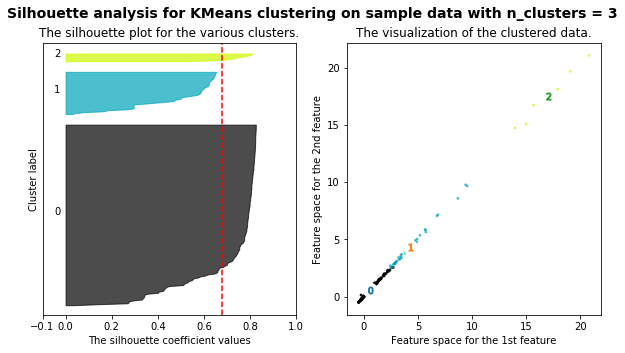

For n_clusters = 4 The average silhouette_score is : 0.575432482631


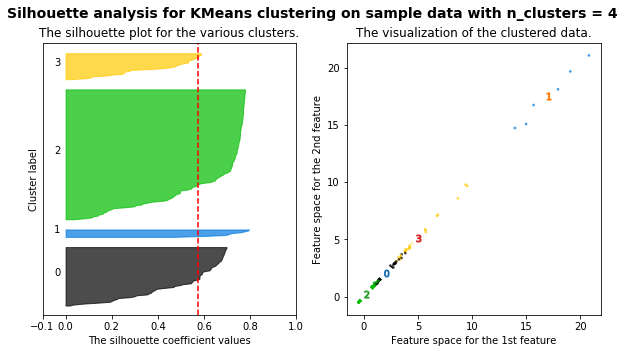

For n_clusters = 5 The average silhouette_score is : 0.567531600486


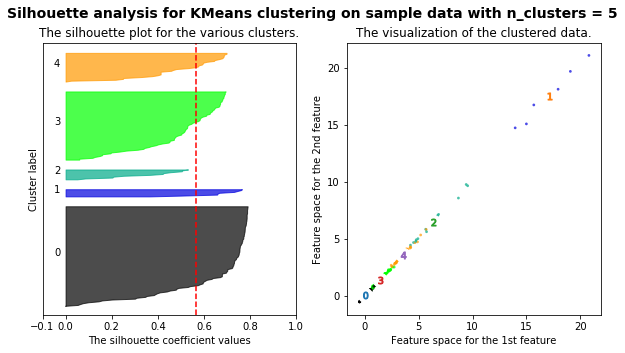

For n_clusters = 6 The average silhouette_score is : 0.560412383804


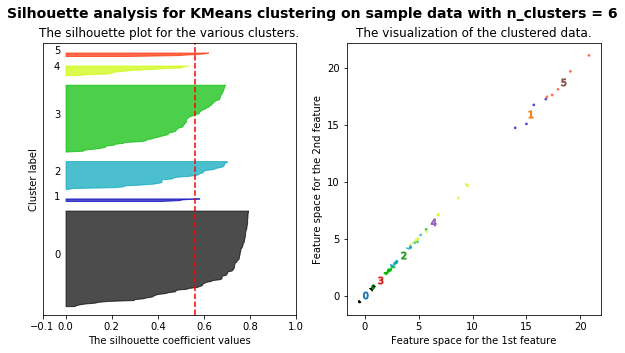

For n_clusters = 7 The average silhouette_score is : 0.544238874729


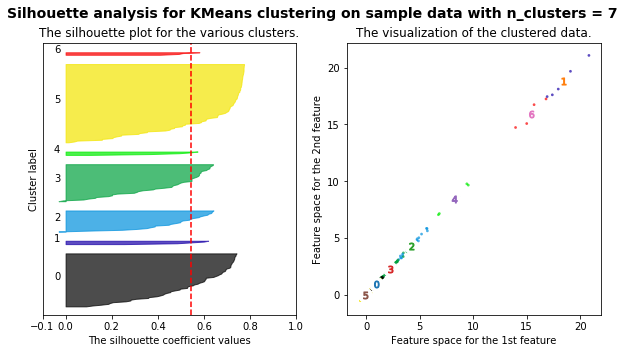

For n_clusters = 8 The average silhouette_score is : 0.536064347729


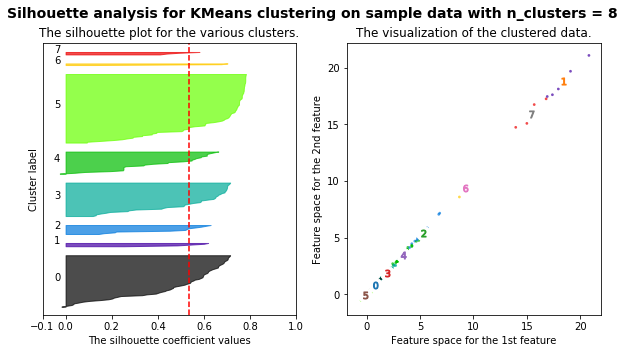

For n_clusters = 9 The average silhouette_score is : 0.534974981872


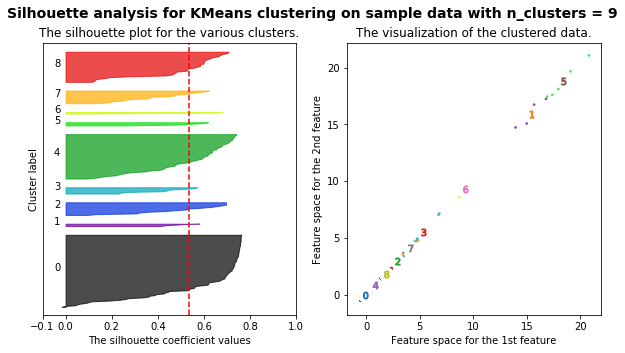

In [26]:
silhouette_score_plot(X,range(3,10))

### Fig. 1

### It shows 7 is the best K numbers because most of clusteres are above the mean and most of datas are fall in the clusteres

In [27]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

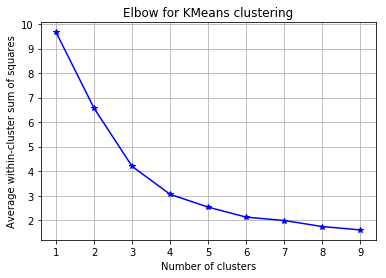

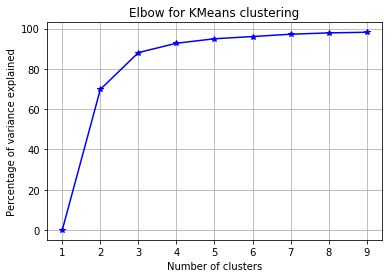

In [28]:
elbow(X, range(1,10))

# Fig. 2

#### There is a kink between 7 and 8 so it shows the cluster should be 7 

#### According to the silouet score and elobow shows 7 cluster is the best one

### plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).


In [29]:
n=7 # number of clusters.

#Kmeans
import sklearn.cluster as cluster
KM=cluster.KMeans(n_clusters=n)# claster=4
KM.fit(data.dropna())
res_KM=KM.predict(data)
data['K_mean_predict'] = res_KM

In [30]:
data.reset_index(level = 0, inplace = True)

In [31]:
data0 = data[data['K_mean_predict'] == 0 ]
data1 = data[data['K_mean_predict'] == 1 ]
data2 = data[data['K_mean_predict'] == 2 ]
data3 = data[data['K_mean_predict'] == 3 ]
data4 = data[data['K_mean_predict'] == 4 ]
data5 = data[data['K_mean_predict'] == 5 ]
data6 = data[data['K_mean_predict'] == 6 ]

Text(0,0.5,'Standarized EST value')

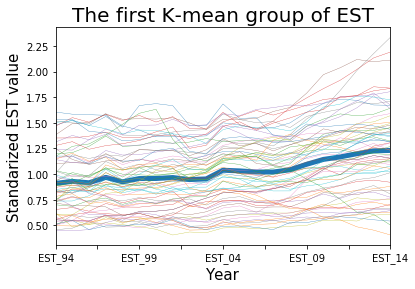

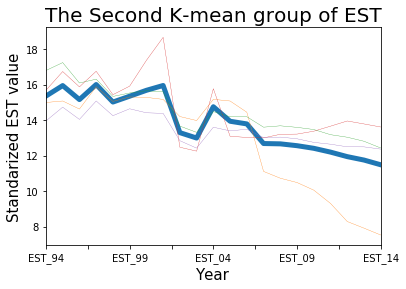

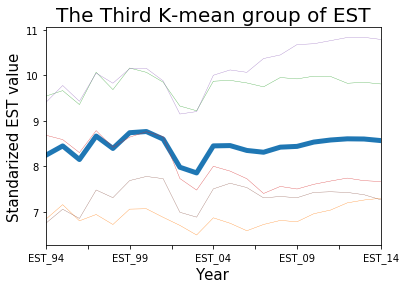

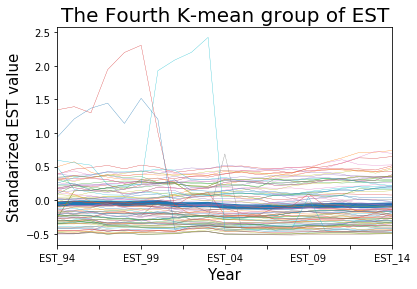

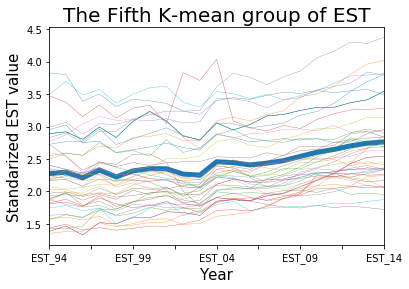

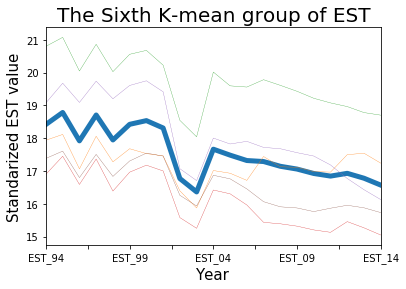

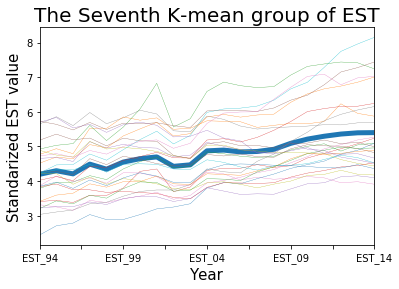

In [32]:
fig = plt.figure()

data0.iloc[:,1:22].mean().plot(linewidth = 5)
for i in range(data0.shape[0]):
    data0.iloc[i,1:22].plot(linewidth = 0.3)
plt.title("The first K-mean group of EST", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Standarized EST value", fontsize = 15)

fig = plt.figure()

data1.iloc[:,1:22].mean().plot(linewidth = 5)
for i in range(data1.shape[0]):
    data1.iloc[i,1:22].plot(linewidth = 0.3)

plt.title("The Second K-mean group of EST", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Standarized EST value", fontsize = 15)


fig = plt.figure()
data2.iloc[:,1:22].mean().plot(linewidth = 5)
for i in range(data2.shape[0]):
    data2.iloc[i,1:22].plot(linewidth = 0.3)

plt.title("The Third K-mean group of EST", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Standarized EST value", fontsize = 15)


fig = plt.figure()

data3.iloc[:,1:22].mean().plot(linewidth  = 5)
for i in range(data3.shape[0]):
    data3.iloc[i,1:22].plot(linewidth = 0.3)

plt.title("The Fourth K-mean group of EST", fontsize= 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Standarized EST value", fontsize = 15)
    
    
fig = plt.figure()

data4.iloc[:,1:22].mean().plot(linewidth = 5)
for i in range(data4.shape[0]):
    data4.iloc[i,1:22].plot(linewidth = 0.3)

plt.title("The Fifth K-mean group of EST", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Standarized EST value", fontsize = 15)


fig = plt.figure()
data5.iloc[:,1:22].mean().plot(linewidth = 5)
for i in range(data5.shape[0]):
    data5.iloc[i,1:22].plot(linewidth = 0.3)

plt.title("The Sixth K-mean group of EST", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Standarized EST value", fontsize = 15)


fig = plt.figure()
data6.iloc[:,1:22].mean().plot(linewidth = 5)
for i in range(data6.shape[0]):
    data6.iloc[i,1:22].plot(linewidth = 0.3)

plt.title("The Seventh K-mean group of EST", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Standarized EST value", fontsize = 15)


# Fig. 3

####  All of each group timeseries is thiner graph and the mean of each group's timeseries is thicker one.
#### It shows each group has similar trend but the group forth and fifth has outliners. 
#### The Seconde and Sixth group has only descrese trend but the EST value is way higher than other groups. It would be interesting to see it on Map

## overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters

In [33]:
KZIP = ZIP.merge(data, on = 'ZIP')

Text(0.5,1,'NYC Business EST timeline clustering from 1994 to 2014')

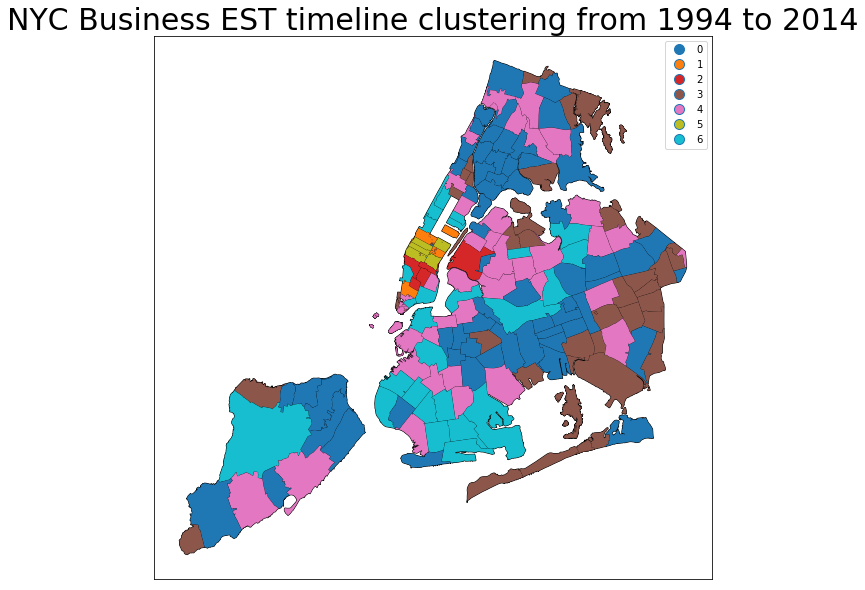

In [58]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
vmin, vmax = min(KZIP['K_mean_predict']) , max(KZIP['K_mean_predict'])


base = KZIP.plot( color = 'white', edgecolor='black' ,ax = ax)
KZIP.plot(column = 'K_mean_predict', cmap='tab10',vmin = vmin, vmax = vmax , \
        edgecolor='black', linewidth = 0.1 ,\
          categorical=True ,legend = True, ax =ax)
plt.title('NYC Business EST timeline clustering from 1994 to 2014',fontsize = 30)

# Fig.4

#### This map shows the clusteres correspond the cluster number. The group number 3 has lower manhattan, which is WTC place, so the big drop would be 9/11 and the time is 2001 so it would be right.
#### The group number 4 shows businees est is slowly increased and it means slowly the ZIP code area is developing.
#### The group number 1 and 5 has decreased trend, and it shows most developed place in NYC and it hits top floor


## Use another clustering algorithm (of your choice)


#### Let's clustering with different way

#### I will use AgglomerativeClustering

In [35]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering



In [36]:
Adata = data.drop( ['K_mean_predict'], axis = 1)

In [37]:
Adata.set_index('ZIP', inplace = True)

In [38]:
agc = AgglomerativeClustering(n_clusters=7,  compute_full_tree=True).fit(Adata)
labelsag = agc.labels_


In [39]:
Adata['Hpredict'] = labelsag

In [41]:
Adata

,EST_94,EST_95,EST_96,EST_97,EST_98,EST_99,EST_00,EST_01,EST_02,EST_03,...,EST_06,EST_07,EST_08,EST_09,EST_10,EST_11,EST_12,EST_13,EST_14,Hpredict
ZIP,,,,,,,,,,,,,,,,,,,,,
11436,-0.349504,-0.352005,-0.333978,-0.359501,-0.353414,-0.344562,-0.325559,-0.349737,-0.278598,-0.287727,...,-0.302416,-0.296768,-0.279482,-0.266974,-0.248426,-0.236928,-0.259716,-0.249327,-0.224136,1
11213,0.731241,0.774534,0.769146,0.850692,0.849260,0.864536,0.867739,0.908417,0.968803,1.006771,...,1.010994,0.972989,1.073331,1.177751,1.324120,1.316200,1.439364,1.491045,1.504497,0
11212,1.032632,0.999842,0.969450,1.062850,0.970942,1.062653,0.992282,1.006530,1.051430,1.038152,...,1.024534,1.056384,1.100280,1.248759,1.389529,1.421910,1.425901,1.427373,1.452351,0
11225,0.655133,0.674059,0.638513,0.713238,0.679471,0.678073,0.693957,0.703534,0.790222,0.794944,...,0.832262,0.860002,0.879302,0.964729,1.065208,1.107490,1.162018,1.273499,1.306343,0
11218,2.493922,2.586130,2.557369,2.700346,2.666005,2.834055,2.848846,2.890875,2.786598,2.779840,...,3.085370,3.181611,3.242683,3.460909,3.501701,3.617432,3.806229,3.963647,4.017924,2
11226,2.171221,2.181185,2.081283,2.189375,2.167957,2.175606,2.142135,2.036716,2.090932,2.112977,...,2.229622,2.299238,2.396501,2.477731,2.555993,2.657908,2.793782,2.820201,2.836822,0
11219,4.518418,4.696107,4.644596,5.054993,4.958161,5.304693,5.507699,5.698637,5.302724,5.371449,...,5.847594,5.909436,5.934835,6.273890,6.518700,6.664057,6.743941,6.855423,7.005877,6
11210,1.818076,1.879760,1.773570,1.896538,1.808569,1.747323,1.780091,1.840490,1.749762,1.678863,...,1.899239,1.863432,1.919513,1.991604,2.182615,2.281145,2.193314,2.148991,2.166748,0
11230,3.790817,3.956245,3.974012,4.158554,4.044128,4.351982,4.563488,4.700194,4.388496,4.419536,...,4.718332,4.680032,4.719459,4.900172,5.006112,5.078402,4.867144,5.046073,5.097341,2


In [42]:
Adata0 = Adata[Adata['Hpredict'] == 0 ]
Adata1 = Adata[Adata['Hpredict'] == 1 ]
Adata2 = Adata[Adata['Hpredict'] == 2 ]
Adata3 = Adata[Adata['Hpredict'] == 3 ]
Adata4 = Adata[Adata['Hpredict'] == 4 ]
Adata5 = Adata[Adata['Hpredict'] == 5 ]
Adata6 = Adata[Adata['Hpredict'] == 6 ]

In [43]:
Adata0.iloc[:,:-1]

,EST_94,EST_95,EST_96,EST_97,EST_98,EST_99,EST_00,EST_01,EST_02,EST_03,...,EST_05,EST_06,EST_07,EST_08,EST_09,EST_10,EST_11,EST_12,EST_13,EST_14
ZIP,,,,,,,,,,,,,,,,,,,,,
11213,0.731241,0.774534,0.769146,0.850692,0.849260,0.864536,0.867739,0.908417,0.968803,1.006771,...,1.009065,1.010994,0.972989,1.073331,1.177751,1.324120,1.316200,1.439364,1.491045,1.504497
11212,1.032632,0.999842,0.969450,1.062850,0.970942,1.062653,0.992282,1.006530,1.051430,1.038152,...,1.094361,1.024534,1.056384,1.100280,1.248759,1.389529,1.421910,1.425901,1.427373,1.452351
11225,0.655133,0.674059,0.638513,0.713238,0.679471,0.678073,0.693957,0.703534,0.790222,0.794944,...,0.830218,0.832262,0.860002,0.879302,0.964729,1.065208,1.107490,1.162018,1.273499,1.306343
11226,2.171221,2.181185,2.081283,2.189375,2.167957,2.175606,2.142135,2.036716,2.090932,2.112977,...,2.365553,2.229622,2.299238,2.396501,2.477731,2.555993,2.657908,2.793782,2.820201,2.836822
11210,1.818076,1.879760,1.773570,1.896538,1.808569,1.747323,1.780091,1.840490,1.749762,1.678863,...,1.886792,1.899239,1.863432,1.919513,1.991604,2.182615,2.281145,2.193314,2.148991,2.166748
10466,1.102653,1.112495,1.102986,1.200304,1.115263,1.147145,1.113929,1.147928,1.128727,1.085225,...,1.218179,1.103068,1.085975,1.059857,1.117668,1.152421,1.123753,1.097394,1.119624,1.118618
10467,2.350838,2.302973,2.269976,2.323841,2.182106,2.175606,2.156617,2.169457,2.120251,2.073750,...,2.335286,2.235038,2.148589,2.237505,2.267440,2.346138,2.327224,2.333334,2.340007,2.341437
10463,2.402592,2.339510,2.281587,2.368663,2.258511,2.268838,2.194269,2.180999,2.069609,2.052829,...,2.197711,2.142964,2.178181,2.188998,2.253785,2.278004,2.302829,2.336026,2.361231,2.349259
10463,2.402592,2.339510,2.281587,2.368663,2.258511,2.268838,2.194269,2.180999,2.069609,2.052829,...,2.197711,2.142964,2.178181,2.188998,2.253785,2.278004,2.302829,2.336026,2.361231,2.349259


In [44]:
Adata2

,EST_94,EST_95,EST_96,EST_97,EST_98,EST_99,EST_00,EST_01,EST_02,EST_03,...,EST_06,EST_07,EST_08,EST_09,EST_10,EST_11,EST_12,EST_13,EST_14,Hpredict
ZIP,,,,,,,,,,,,,,,,,,,,,
11218,2.493922,2.586130,2.557369,2.700346,2.666005,2.834055,2.848846,2.890875,2.786598,2.779840,...,3.085370,3.181611,3.242683,3.460909,3.501701,3.617432,3.806229,3.963647,4.017924,2
11230,3.790817,3.956245,3.974012,4.158554,4.044128,4.351982,4.563488,4.700194,4.388496,4.419536,...,4.718332,4.680032,4.719459,4.900172,5.006112,5.078402,4.867144,5.046073,5.097341,2
11204,3.413317,3.444736,3.384712,3.593797,3.588527,3.801333,4.282541,4.351027,3.695495,3.831128,...,4.371700,4.475579,4.398772,4.444087,4.668165,4.801929,4.934461,5.080562,5.240742,2
10461,2.950575,3.024567,2.754770,2.769073,2.600919,2.641764,2.683753,2.743706,2.674652,2.636007,...,2.763111,2.786158,2.811507,2.791802,2.809453,2.755486,2.796474,2.724693,2.688206,2
10025,4.262692,4.278983,4.188831,4.648607,4.477091,4.719082,4.630104,4.503968,4.447135,4.477070,...,4.786034,4.706933,4.689816,4.932945,5.052444,5.018771,5.009856,4.939953,4.823576,2
10128,3.863881,4.148061,3.985624,4.092815,3.939425,4.241270,4.236200,4.128830,3.855419,3.888662,...,4.033192,4.112407,4.053832,4.089050,4.133990,4.094483,3.954326,3.982218,3.911025,2
11377,3.489426,3.700490,3.483412,3.572880,3.359312,3.498330,3.599001,3.620951,3.370318,3.300254,...,3.429294,3.496360,3.412458,3.474564,3.550758,3.663511,3.779302,3.793854,3.814555,2
11355,2.445213,2.710963,2.789605,3.035016,2.889561,2.892325,3.034212,3.199643,3.253041,3.347326,...,3.924870,4.072055,4.204743,4.367618,4.477388,4.576956,4.778286,4.892199,5.097341,2
11222,2.725293,2.765767,2.772187,2.963301,2.722602,2.810747,2.895187,2.980331,2.863894,2.785070,...,2.977048,3.014821,3.051349,3.174149,3.231888,3.354511,3.539654,3.690387,3.801519,2


Text(0,0.5,'Standarized EST value')

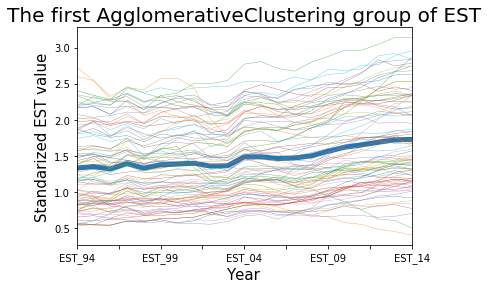

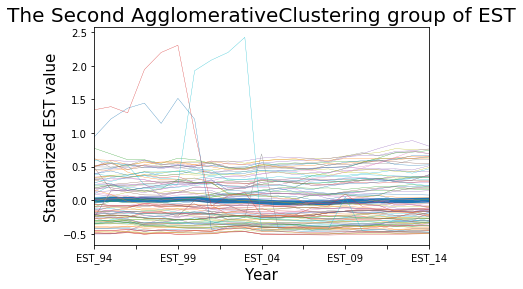

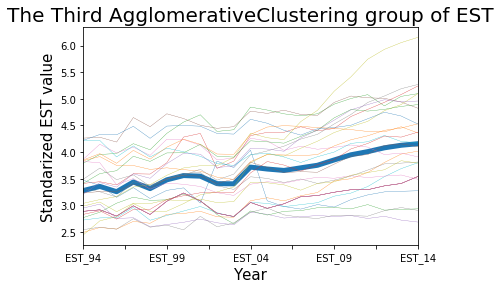

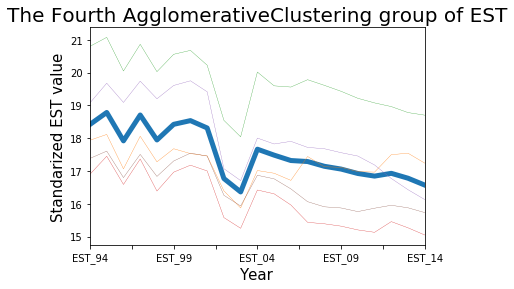

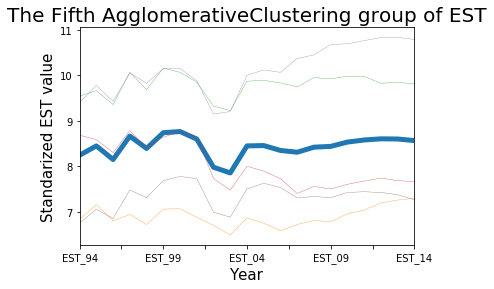

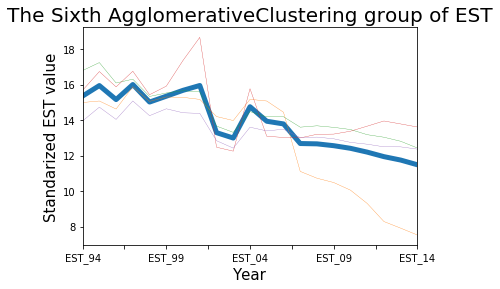

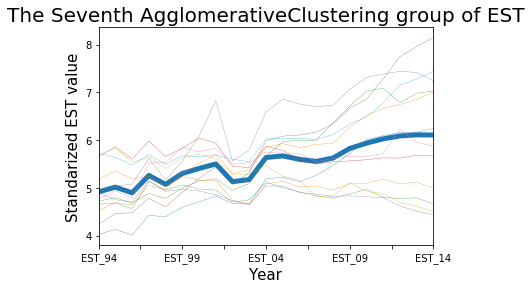

In [45]:
fig = plt.figure()

Adata0.iloc[:,:-1].mean().plot(linewidth = 5)
for i in range(Adata0.shape[0]):
    Adata0.iloc[i,:-1].plot(linewidth = 0.3)
plt.title("The first AgglomerativeClustering group of EST", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Standarized EST value", fontsize = 15)


fig = plt.figure()
Adata1.iloc[:,:-1].mean().plot(linewidth = 5)
for i in range(Adata1.shape[0]):
    Adata1.iloc[i,:-1].plot(linewidth = 0.3)

plt.title("The Second AgglomerativeClustering group of EST", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Standarized EST value", fontsize = 15)


fig = plt.figure()
Adata2.iloc[:,:-1].mean().plot(linewidth = 5)
for i in range(Adata2.shape[0]):
    Adata2.iloc[i,:-1].plot(linewidth = 0.3)

plt.title("The Third AgglomerativeClustering group of EST", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Standarized EST value", fontsize = 15)


fig = plt.figure()
Adata3.iloc[:,:-1].mean().plot(linewidth  = 5)
for i in range(Adata3.shape[0]):
    Adata3.iloc[i,:-1].plot(linewidth = 0.3)

plt.title("The Fourth AgglomerativeClustering group of EST", fontsize= 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Standarized EST value", fontsize = 15)
    
    
fig = plt.figure()

Adata4.iloc[:,:-1].mean().plot(linewidth = 5)
for i in range(Adata4.shape[0]):
    Adata4.iloc[i,:-1].plot(linewidth = 0.3)

plt.title("The Fifth AgglomerativeClustering group of EST", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Standarized EST value", fontsize = 15)


fig = plt.figure()
Adata5.iloc[:,:-1].mean().plot(linewidth = 5)
for i in range(Adata5.shape[0]):
    Adata5.iloc[i,:-1].plot(linewidth = 0.3)

plt.title("The Sixth AgglomerativeClustering group of EST", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Standarized EST value", fontsize = 15)


fig = plt.figure()
Adata6.iloc[:,:-1].mean().plot(linewidth = 5)
for i in range(Adata6.shape[0]):
    Adata6.iloc[i,:-1].plot(linewidth = 0.3)

plt.title("The Seventh AgglomerativeClustering group of EST", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Standarized EST value", fontsize = 15)


# Fig. 5

#### I don't know how many number of clustering should I go so I followed K-mean result, which is 7 clusters. Just looking at the timeseries, it looks very similar to the K-mean clustering

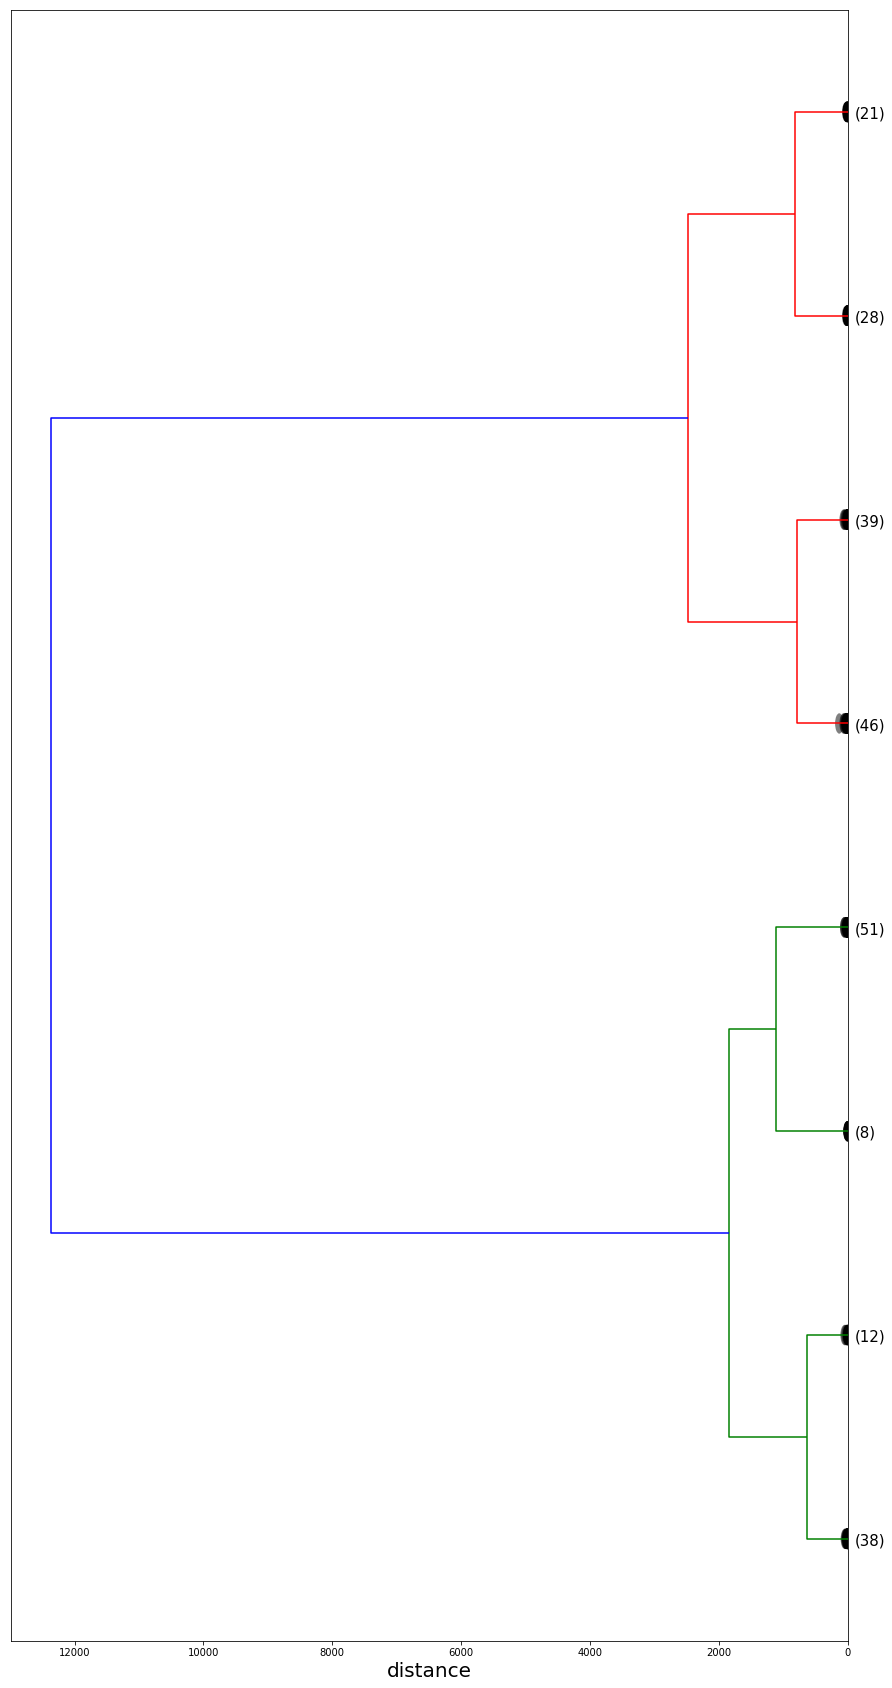

In [75]:
Z = hierarchy.linkage(Adata, method='ward')
plt.figure(figsize = (15,30))
dn = hierarchy.dendrogram(Z, orientation='left', truncate_mode = 'level' , \
                          p=2  ,leaf_font_size = 9, above_threshold_color='b', \
                         show_contracted=True)
plt.xlabel("distance", fontsize=20)
plt.yticks(fontsize=15, rotation=0)
plt.grid('off')

# Fig. 6
#### It shows hierarchy clustering and how many ZIPCODE is in the clusters. I didn't do pruning so I don't have any justifycation about choosing depth of clustering but I tried to show most closed 7 clustering, which is 8, according to the K-mean and Agglomerative clustering

In [46]:
Adata.reset_index(level=0, inplace = True)

In [47]:
AZIP = ZIP.merge(Adata, on = 'ZIP')

Text(0.5,1,'NYC Business EST timeline K-mean clustering from 1994 to 2014')

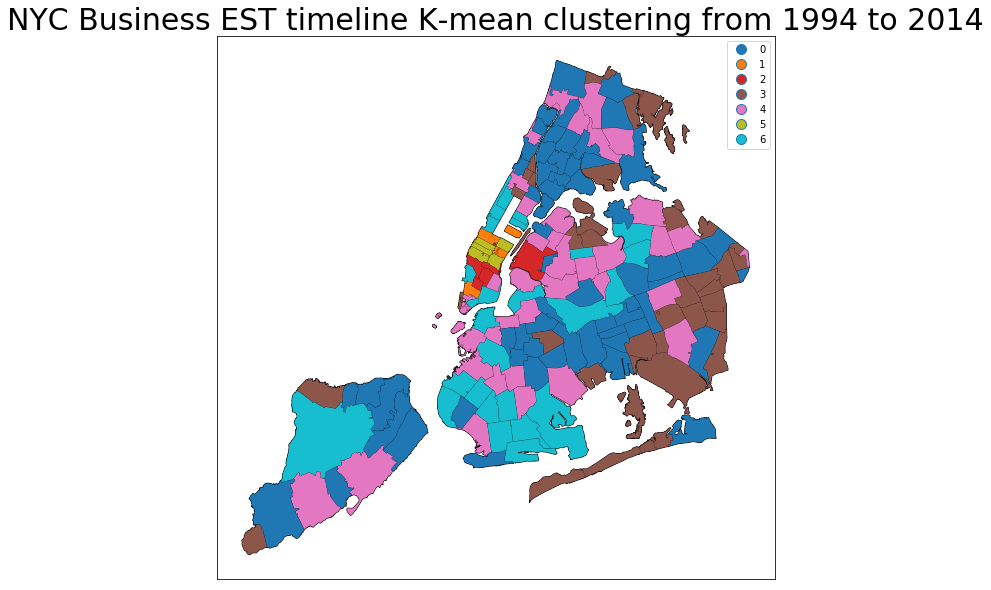

In [60]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
vmin, vmax = min(KZIP['K_mean_predict']) , max(KZIP['K_mean_predict'])


base = KZIP.plot( color = 'white', edgecolor='black' ,ax = ax)
KZIP.plot(column = 'K_mean_predict', cmap='tab10',vmin = vmin, vmax = vmax , \
        edgecolor='black', linewidth = 0.1 ,\
          categorical=True ,legend = True, ax =ax)
plt.title('NYC Business EST timeline K-mean clustering from 1994 to 2014',fontsize = 30)

Text(0.5,1,'NYC Business EST timeline Agglomerative clustering from 1994 to 2014')

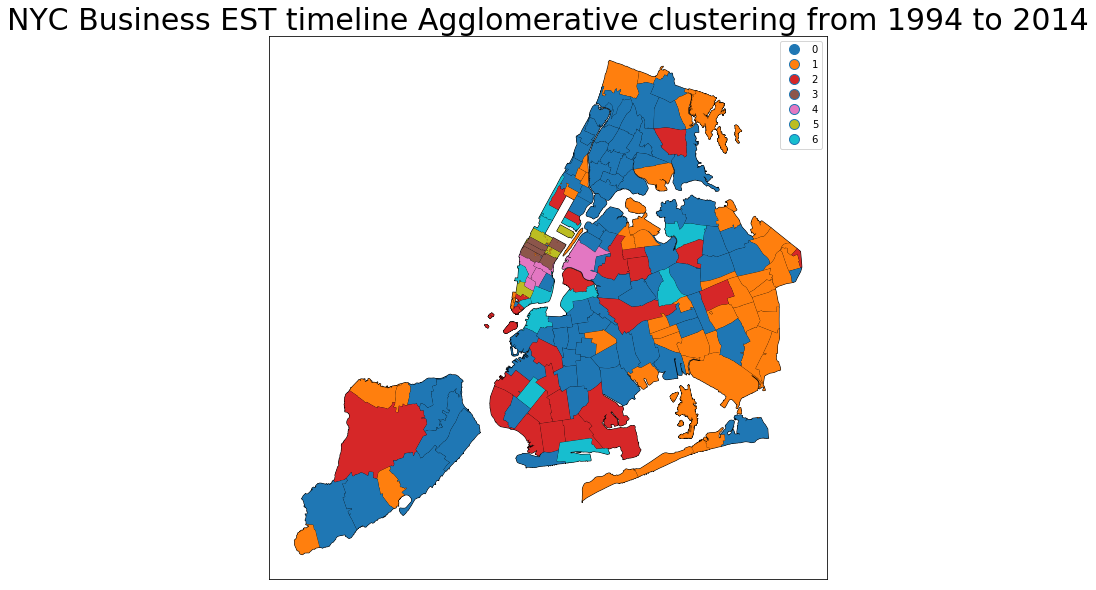

In [59]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
vmin, vmax = min(AZIP['Hpredict']) , max(AZIP['Hpredict'])


base = AZIP.plot( color = 'white', edgecolor='black' ,ax = ax)
AZIP.plot(column = 'Hpredict', cmap='tab10',vmin = vmin, vmax = vmax , \
          legend = True, edgecolor='black', linewidth = 0.1,\
          categorical = True, ax =ax)
plt.title('NYC Business EST timeline Agglomerative clustering from 1994 to 2014', fontsize = 30)


## Compare the results of the 2 algorithms

### They are very similar but the Bronx, LIC Area are most different. Other places are pretty similar 

## attempt an interpretation. this is dangerous ground: clustering is an exploratory tool so you do not want to jump to conclusions because you see some clusters! but seeing structure in your data can inform your next moves as an investigator

## It shows Manhattan has a lot of different clusters compare to other broughs. Other broughs are pretty much falls in two types of clustering but Manhattan is very different. I would like to Zoom in and only see what it's going on